## **PHYS 3112 Computational Essay**
### **Quantum Dots** 
##### Kevin Nguyen z5117568

#### __INTRODUCTION__

The Schrodinger Equation is a key result in quantum mechanics that has been extensively used throughout physics as it allows for the characterisation of quantum particles and their wave-like, probabilistic nature<sup>1</sup>.  In this report, we numerically solve both the time-independant and time-dependant Schrodinger equation (TISE, TDSE respectively) via python to model the behaviour of a semiconductor particle called a __'Quantum Dot'__ (QD). Quantum dots most notably have the ability to be used as a single-electon transistor, allowing it to have a wide array of applications in solid-state electronics and has been an important research area for quantum computing.



#### __BACKGROUND__

##### __The Quantum Dot__

The quantum dot in this model is a metal-oxide semiconductor (MOS) device that can be used to encode information through either the charge of the electron or its spin.

<center><img src="QD.png" width="400" height="200"></center>

Voltages passed through the metal gates at G1 and G2 create an electrostatic potential at each metal gate that traps an electron near the surface of silicon. This trapped electron is what we call the quantum dot and posses discrete energy levels that can be leveraged to control their superposition by choosing appropriate basis states.

##### __The Schrodinger Equation__

Importantly, the equation also predicts that the wavefunction can form standing waves<sup>1</sup>.

$$ (-\frac{\hbar}{2m}\nabla^{2} + V) \psi = E\psi$$
The TISE is an incredibly useful tool to solve stationary states due to its ability to be simplified as an _eigenvalue problem_ (A $\upsilon$ = $\lambda\upsilon$). This can be seen as:
$$ H\psi = E\psi $$
where __H = Hamiltonian, E = Eigenvalues and $\psi$ = Eigenvectors__ 

As such, this provides an easy way to solve the Schrodinger equation and to characterise our model's energy levels and their corresponding probability distributions.

#### __RESULTS & DISCUSSION__

#### __PART A - Analytical Solution__

A general two-level quantum system mapped to a qubit can be modelled by the Hamiltonian:
$$H = \begin{bmatrix} E & t \\ t* & -E\end{bmatrix}$$
To solve the eigenvalues and eigenvectors of this Hamiltonian analytically, we first follow
$$det(H-\lambda I) = 0$$


$$det(\begin{bmatrix} E-\lambda & t \\ t* & -E-\lambda \end{bmatrix}) = 0$$
$$-(E-\lambda)(E+\lambda) - |t|^2 = 0$$
$$\lambda_{1} = \sqrt(|t|^2+E^2)$$
$$\lambda_{2} = -\sqrt(|t|^2+E^2)$$


The corresponding eigenvectors can then be solved with $(H-\lambda I)\upsilon = 0$, resulting in:

$$\psi_{1} = \begin{bmatrix} \frac{t}{\sqrt(|t|^2 + E^2 + E)} \\ 1 \end{bmatrix}$$
and
$$\psi_{2} = \begin{bmatrix} \frac{-t}{\sqrt(|t|^2 + E^2 + E)} \\ 1 \end{bmatrix}

With this, we can calculate our energy gap with $E_2 - E_1 = \lambda_2 - \lambda_1 = -2\sqrt{|t|^2 + E^2}$. As E cannot be negative, our minimum energy gap is 0.

Plotting our eigenvalues against E for $\lambda_{1}$ and $\lambda_{2}$ respectively,

<center><img src="lambda_1.png" width="800" height="400"></center>

<center><img src="lambda_2.png" width="800" height="400"></center>

To find our proabilities, we first normalise our eigenvectors. As the formula for normalising a vector is $\upsilon_n = \frac{1}{\sqrt(x_{1}^1+x_{2}^2)}$ $\begin{bmatrix} x_{1} \\ {x_{2}}\end{bmatrix}$ and our eigenvectors are symmetric, our normalising constant is the same for both.
$$N = \frac{1}{\sqrt{\frac{t^2}{t^2 + E^2 + E} + 1}} = \frac{1}{\sqrt{\frac{2t^2 + E^2 + E}{t^2 + E^2 + E}}}$$

With our normalised wavefunctions, and our basis states $\ket{1} = \begin{bmatrix} 1 \\ 0\end{bmatrix}$ and $\bra{0} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$, we can use the following identities to make our calculations.
$$\psi = c_1\ket{0} + c_2\ket{1}$$
$$ |c_1(E,t)|^2 = |\braket{\psi|0}|^2$$
$$ \sqrt{|c_1|^2 + {|c_2|^2}} = 1$$ 


So, for $\psi_1$
$$ \braket{\psi_1|0} = \frac{1}{\sqrt{\frac{2t^2 + E^2 + E}{t^2 + E^2 + E}}} \begin{bmatrix} \frac{t}{\sqrt(|t|^2 + E^2 + E)} & 1 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix}$$
$$ c_1(E,t) = \frac{1}{\sqrt{\frac{2t^2 + E^2 + E}{t^2 + E^2 + E}}} $$

$$|c_{1}(E,t)|^2 = \frac{t^2 + E^2 + E}{2t^2 + E^2 + E}$$

Similarly, with $ \braket{\psi_1|1}$
$$|c_{2}(E,t)|^2 = \frac{t}{2t^2 + E^2 + E}$$

Because every step in this calculation requires a squaring of the eigenvector or its result and $\psi_2$ is just the negative of $\psi_1$, our values for $c_1$ and $c_2$ for $\psi_2$ are exactly the same.

Plotting these probabilities ($c_1$ in red and $c_2$ in blue), 
<center><img src="psi_1.png" width="600" height="300"></center>
We encounter a graph that matches our expectations. As these are probability distribution plots of only two outcomes, the sum of these curves at any given energy level E will equal 1. We can see that at E=0, there is an equal chance of either spin (0.5) which then deviates symmetrically about y=0.5. We also note that there is a asymptote at P(x) = 1 and P(x) = 0 that each curve approaches which is in line with what we expect from this probability graph.

#### __PART B - Single Quantum Dot__ 

First we import all our modules, define our constants and create a grid spacing. Note that we use the effective mass of an electron (0.2 * m) as the QD is assumed to be in silicon.

In [261]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar=1.055e-34 #Js
q=1.602e-19    #C
m=9.1e-31      #kg
effective_m = 0.2*m

# Grid
Np=100
a=1e-10    #m
X=a*np.linspace(1, Np, Np)/1e-9  #nm
mid = (Np/2)*a/1e-9 #midpoint

We then construct our potential well for our QD following $V(x) = \alpha(x-x_1)^2$ using an initial abritary $\alpha$ = 0.5.

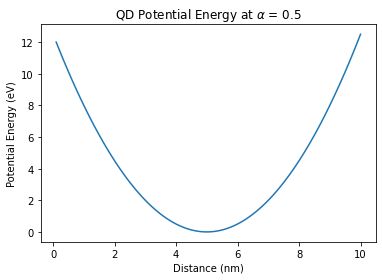

In [262]:
alpha = 0.5
U = alpha * (X-mid)**2

plt.plot(X, U)
plt.xlabel('Distance (nm)')
plt.ylabel('Potential Energy (eV)')
plt.title('QD Potential Energy at $\\alpha$ = %.1f' % alpha)
plt.show()


Our Hamiltonian is then constructed as follows

\begin{bmatrix} 2t + V_1 & -t & 0 & 0 & ... \\ -t & 2t + V_2 & -t & 0 & ... \\ 0 & -t & 2t + V_3 & -t & ... \\ 0 & 0 & -t & 2t+V_4 & ... \\ ... & ... & ... & ... & ...  \end{bmatrix}

where $t = \frac{\hbar^2}{2ma^2}$

In [263]:
#Define Hamiltonian as a tridiagonal matrix
t0=(hbar*hbar)/(2*effective_m*a*a)/q #divide by q to convert to eV
on=2.0*t0*np.ones(Np)
off=-t0*np.ones(Np-1)

H=np.diag(on+U)+np.diag(off,1)+np.diag(off,-1)

Using numpy's linalg.eig function, we can compute the eigenvalues and eigenvectors of any square array which we apply to our Hamiltonian. argsort() is then used to sort our eigenvalues in ascending order as to efficiently locate our ground state and first excited state.

In [264]:
W,V=np.linalg.eig(H)
idx = W.argsort()[::1]   
W = W[idx]
V = V[:,idx]

In [265]:
print("Eigenvalues and Eigenvectors")
print("Lowest eigenvalue and corresponding wavefunction (ground state)")
print(W[0])
print(V[:5,0])

Eigenvalues and Eigenvectors
Lowest eigenvalue and corresponding wavefunction (ground state)
0.30861393190333153
[-9.26940728e-10 -2.42189878e-09 -5.33943022e-09 -1.12603539e-08
 -2.32408238e-08]


In [266]:
print("Second lowest eigenvalue and corresponding wavefunction")
print(W[1])
print(V[:5,1])

Second lowest eigenvalue and corresponding wavefunction
0.9252148874201566
[7.80504940e-09 2.01408072e-08 4.36562092e-08 9.03176284e-08
 1.82664100e-07]


Thus the energy gap between our two lowest eigenvalues is as follows:

In [267]:
print("Energy Gap")
print(W[1]-W[0])

Energy Gap
0.616600955516825


The probability distributions of our respective wavefunctions can be found by squaring our wavefunction
$$ P(x) = |\psi^2|$$

In [268]:
Psi0=np.multiply(V[:,0],V[:,0])
Psi1=np.multiply(V[:,1],V[:,1])

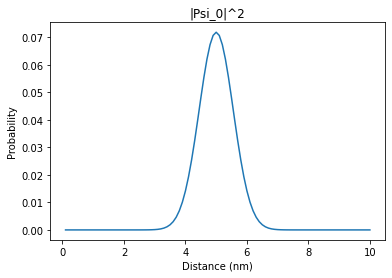

In [269]:
plt.plot(X, Psi0)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_0|^2')
plt.show()

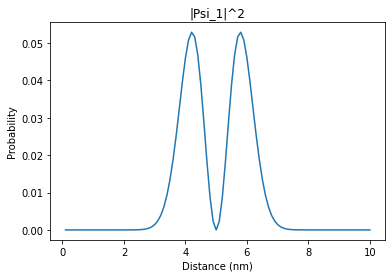

In [270]:
plt.plot(X, Psi1)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_1|^2')
plt.show()

We see exactly what we expect, different standing waves at discretised energy levels. This occurs because the QD's potential well creates the familiar concept of the Quantum Harmonic Oscillator (QHO). What we have just done is essentially solving the QHO to find its stationary states (our eigenvalues) and their corresponding standing waves (eigenvectors).

<center><img src="QHO.png" width="400" height="270"></center>

To engineer an energy splitting of 4 meV, we must first observe the effects of how our potential well affects the difference between our lowest two eigenstates. We can do this by varying our value of alpha in a specific range, redoing our eigenvalue calculations and appending the lowest energy gap into an array. This array can then be plotted against our initial alpha range.

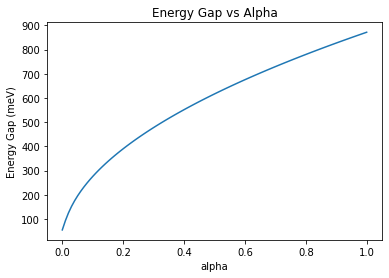

In [271]:
Energy_gap_array = []
for value in alpha_array:
    U_array = value * (X-mid)**2
    H=np.diag(on+U_array)+np.diag(off,1)+np.diag(off,-1)
    W,V=np.linalg.eig(H)
    idx = W.argsort()[::1]
    W = W[idx]
    V = V[:,idx]
    Energy_gap=(W[1]-W[0])/(10**(-3))
    Energy_gap_array.append(Energy_gap)

plt.figure(4)
plt.plot(alpha_array, Energy_gap_array)
plt.xlabel('alpha')
plt.ylabel('Energy Gap (meV)')
plt.title('Energy Gap vs Alpha')
plt.show()

Here we run into a problem, our graph has a lower bound on the energy gap that does not drop below 55 meV. To verify the ideal value, we can do an analytic solution of the QHO to find what the ideal alpha value is.
$$ V(x) = \alpha(x-x_1)^2 = \frac{1}{2}m\omega^2(x-x_1)^2$$
$$ \alpha = \frac{1}{2}m_0\omega^2 = \frac{1}{2}2\pi m_0f = \frac{E_{gap}}{h} \pi m_0$$
We arrive at a value of $\alpha$ = __3.36e-6__

A quick snippet to see what this value achieves in our graph is shown below:

In [272]:
alpha = 3.36e-6
U = alpha * (X-mid)**2
H=np.diag(on+U)+np.diag(off,1)+np.diag(off,-1)
W,V=np.linalg.eig(H)
idx = W.argsort()[::1]   
W = W[idx]
V = V[:,idx]
print("Energy Gap")
print(W[1]-W[0])

Energy Gap
0.05539190560251792


As we can see, we are off by a factor of 10. As this constant is used later in the report, we shall use the ideal value for further calculations. As alpha is a measurement of the curvature of our potential well, this value can be engineered by changing (increasing) the voltage passed through our gates in order to increase the potential.

_(Note to Professor Rajib: I emailed you about this but was unable to find the cause of why this happens. I am sure there is a unit error anywhere but I cannot pinpoint the exact source of error)_

Intuitively, we expect that qubits in the real world would be kept at a low temperature as to minimise the total energy of the system. This provides a dual purpose; to limit the range of possible energy states and their corresponding wavefunctions, and to prevent quantum tunnelling. The latter is a concern as when temperatures are high enough, the energy of the qubit would allow it to overcome small potential barriers.

Quantum dots are often referred to as 'artificial atoms' because they share some key features with isolated atoms. Most notably, QD's have discrete energy levels similar to the bound energy states that naturally occur in atoms. It it also predicted (and possibly shown) that the wavefunctions in QD's resemble the ones in real atoms. We can see a hint of this in our results where our eigenvalues represent the discrete energy levels and their corresponding wavefunctions (with the obvious limitation of our model only being 1D). These similarities arise from the electric potentials from our QD structure, confining our electron, combined with its quantum properties to create the similarly confined nature of electrons we observe in atoms.

We can compare this relatively easily to the electron of a Hydrogen atom. As mentioned, our model acts similarly to an atom - especially for Hydrogen, and the Bohr radii is simply a measure of the peak of the probability distribution of the hydrogen electron. This is because the hydrogen electron can behave as a standing wave, possessing discrete energy levels similar to what we have just seen from our plots. As the bohr radii is 5.29e-11, our system is much larger at a factor of 100. With our alpha of 0.5, our wavefunction will span over 4 atoms in a crystal with 0.543nm spacing.

In the real world, interactions are at an essentially continuous basis. As our model utilises the finite difference method, by definition we are discretising relatively large chunks and appromiximating the interactions on their neighbouring points. This opens up the model to inaccuracies.

#### __PART C__
##### __Double Quantum Dot (DQD)__
#### _Weak Interaction_

For our first case, we model the weak interaction of the dots by placing them 8nm apart.

In [273]:
dot1 = 1
dot2 = 9
dotDistance = dot2-dot1
print("Dot distance = %dnm" % dotDistance)
alpha = 0.5
U = []
for value in X:
    U.append(min(alpha*(value-dot1)**2, alpha*(value-dot2)**2))

Dot distance = 8nm


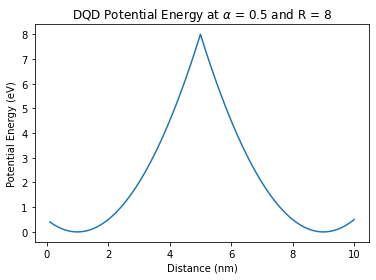

In [274]:
plt.plot(X, U)
plt.xlabel('Distance (nm)')
plt.ylabel('Potential Energy (eV)')
plt.title('DQD Potential Energy at $\\alpha$ = %.1f and R = %d' % (alpha,dotDistance))
plt.show()

Similarly to Part B, we calculate the corresponding wavefunctions and their probabilities.

In [275]:
# Define Hamiltonian
H=np.diag(on+U)+np.diag(off,1)+np.diag(off,-1)

W,V=np.linalg.eig(H)
idx = W.argsort()[::1]   
W = W[idx]
V = V[:,idx]

# Calculate probablity
Psi0 = V[:,0]
Psi1 = V[:,1]
Psi0_prob=np.multiply(V[:,0],V[:,0])
Psi1_prob=np.multiply(V[:,1],V[:,1])

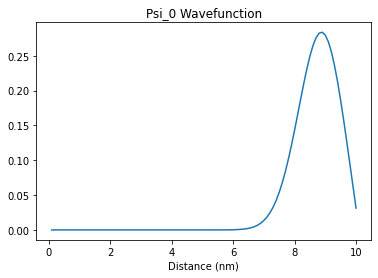

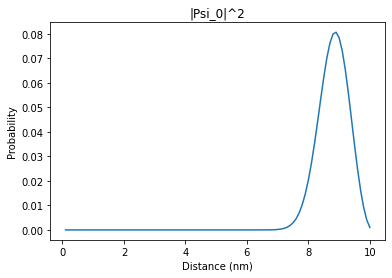

In [276]:
plt.plot(X, Psi0)
plt.xlabel('Distance (nm)')
plt.title('Psi_0 Wavefunction')
plt.show()

plt.plot(X, Psi0_prob)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_0|^2')
plt.show()

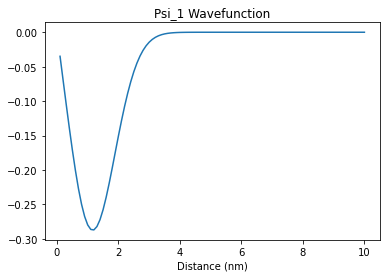

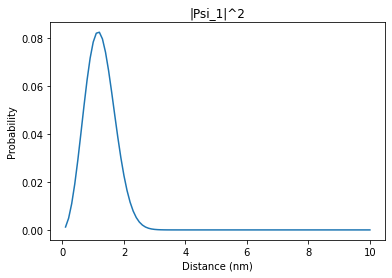

In [277]:
plt.plot(X, Psi1)
plt.xlabel('Distance (nm)')
plt.title('Psi_1 Wavefunction')
plt.show()

plt.plot(X, Psi1_prob)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_1|^2')
plt.show()

Instantly, we notice that a big difference in our wavefunctions behaviour as compared to the single quantum dot. As these regimes are weakly interacting, they essentially act as two single quantum dots that are spaced apart. We can trivially assume that the two lowest energy states of the system would be the ground states of each corresponding well. Hence, our wavefunctions of our lowest energy states represent the two seperate quantum dots at 1nm at 9nm.

_Strong Interaction_

We recreate the model in the strong regime by setting the dots to be 2nm apart.

In [278]:
dot1 = 4
dot2 = 6
dotDistance = dot2-dot1
print("Dot distance = %dnm" % dotDistance)
U = []
for value in X:
    U.append(min(alpha*(value-dot1)**2, alpha*(value-dot2)**2))

Dot distance = 2nm


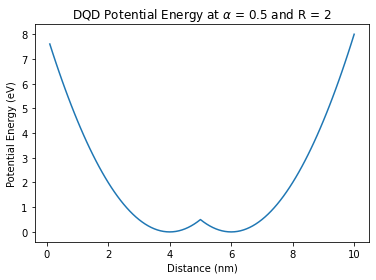

In [279]:
plt.figure(1)
plt.plot(X, U)
plt.xlabel('Distance (nm)')
plt.ylabel('Potential Energy (eV)')
plt.title('DQD Potential Energy at $\\alpha$ = %.1f and R = %d' % (alpha,dotDistance))
plt.show()

In [280]:
# Define Hamiltonian
H=np.diag(on+U)+np.diag(off,1)+np.diag(off,-1)

W,V=np.linalg.eig(H)
idx = W.argsort()[::1]   
W = W[idx]
V = V[:,idx]

# Calculate probablity
Psi0 = V[:,0]
Psi1 = V[:,1]
Psi0_prob=np.multiply(V[:,0],V[:,0])
Psi1_prob=np.multiply(V[:,1],V[:,1])

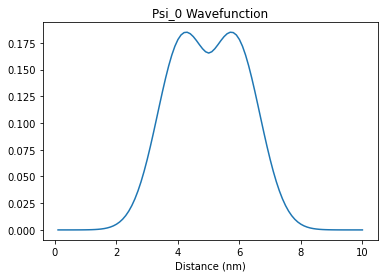

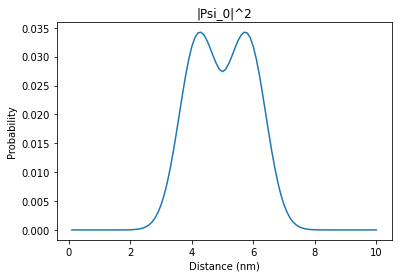

In [281]:
plt.plot(X, Psi0)
plt.xlabel('Distance (nm)')
plt.title('Psi_0 Wavefunction')
plt.show()

plt.plot(X, Psi0_prob)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_0|^2')
plt.show()

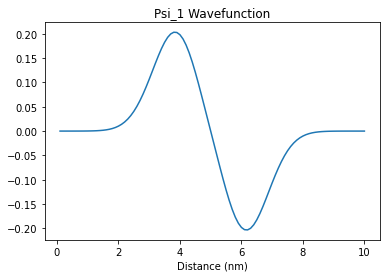

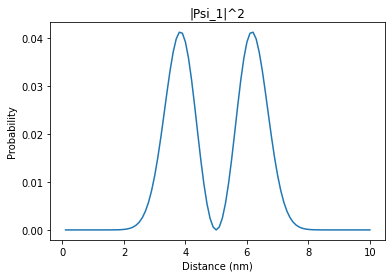

In [282]:
plt.plot(X, Psi1)
plt.xlabel('Distance (nm)')
plt.title('Psi_1 Wavefunction')
plt.show()

plt.plot(X, Psi1_prob)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_1|^2')
plt.show()

We can see a stark difference between the two regimes of interaction in our DQD. Our first wavefunction in this regime show an electron with a high probability of tunneling. We can see this from the small dip in the probability of the wavefunction at the midpoint of the two dots. We can also interpret this as the wavefunction tending towards our the one seen in our single quantum dot model. This is because as the seperation distance approaches 0, we edge closer towards a single QD system. In contrast, our first excited state exhibits low tunnelling behaviour as seen by the ~0 probability of the particle being found inbetween the wells.

##### __Energy Gap vs Seperation Distance__

In [283]:
Energy_gap_array = []

seperation_distance = np.linspace(2,9,100)

for distance in seperation_distance:
    dot1 = mid-(distance/2)
    dot2 = mid+(distance/2)
    
    U = []
    for value in X:
        U.append(min(alpha*(value-dot1)**2, alpha*(value-dot2)**2))
        
    H=np.diag(on+U)+np.diag(off,1)+np.diag(off,-1)
    W,V=np.linalg.eig(H)
    idx = W.argsort()[::1]   
    W = W[idx]
    V = V[:,idx]
    Energy_gap=W[1]-W[0]
    Energy_gap_array.append(Energy_gap)

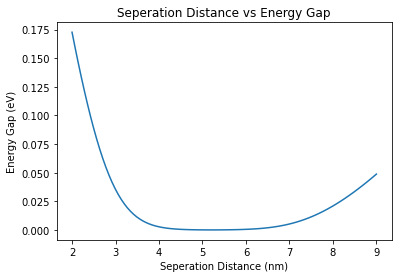

In [284]:
plt.plot(seperation_distance, Energy_gap_array)
plt.xlabel('Seperation Distance (nm)')
plt.ylabel('Energy Gap (eV)')
plt.title('Seperation Distance vs Energy Gap')
plt.show()

The seperation distance in our model is a direct variable in our initial Hamiltonian of $H = \begin{bmatrix} E & t \\ t* & -E\end{bmatrix}$ through 't'. This is because as noted earlier, 't' is a function of $\hbar, m and a$, 'a' being the distance between our points for the finite difference method. There is no reprersentation in a classical system.

#### __Detuning Bias__
The detuning bias is based on the concept of applying voltages to the two gates, $G_1$ and $G_2$ in order to create an electric field in the x-direction. This essentially creates an extra potential energy term and can be modelled by changing our potential well as below:

In [285]:
F = 0.5
U = []
for value in X:
    detuning_bias = F*value
    U.append(min(alpha*(value-dot1)**2, alpha*(value-dot2)**2) + detuning_bias)

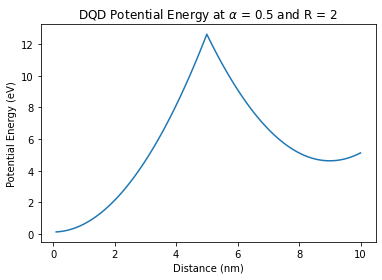

In [286]:
plt.figure(1)
plt.plot(X, U)
plt.xlabel('Distance (nm)')
plt.ylabel('Potential Energy (eV)')
plt.title('DQD Potential Energy at $\\alpha$ = %.1f and R = %d' % (alpha,dotDistance))
plt.show()

In [287]:
H=np.diag(on+U)+np.diag(off,1)+np.diag(off,-1)

W,V=np.linalg.eig(H)
idx = W.argsort()[::1]   
W = W[idx]
V = V[:,idx]

Psi0 = V[:,0]
Psi1 = V[:,1]

Psi0_prob=np.multiply(V[:,0],V[:,0])
Psi1_prob=np.multiply(V[:,1],V[:,1])

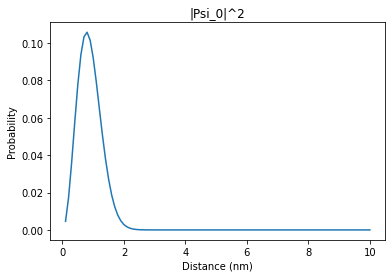

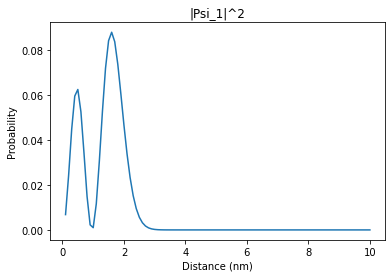

In [288]:
plt.plot(X, Psi0_prob)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_0|^2')
plt.show()

plt.plot(X, Psi1_prob)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_1|^2')
plt.show()

### __References__

[1]https://en.wikipedia.org/wiki/Schr%C3%B6dinger_equation

[2]https://quantummechanics.ucsd.edu/ph130a/130_notes/node132.html

[3]http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/eigen.html

[4]https://chem.libretexts.org/Courses/Pacific_Union_College/Quantum_Chemistry/03%3A_The_Schrodinger_Equation_and_a_Particle_in_a_Box/3.03%3A_The_Schr%C3%B6dinger_Equation_is_an_Eigenvalue_Problem#:~:text=Both%20time%2Ddependent%20and%20time,levels%20of%20the%20quantum%20system.&text=The%20object%20on%20the%20left,an%20example%20of%20an%20operator.

[5]http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hosc5.html#c1

[6]http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hosc2.html#c1